<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Analyse_the_income_earned_vs_income_spent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [5]:
dataset = pd.read_csv("Question 2.csv")
print(dataset)
dataset.shape

     INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]


(303, 2)

In [6]:
dataset_feature= dataset.iloc[:, [0,1]].values
dataset_feature

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

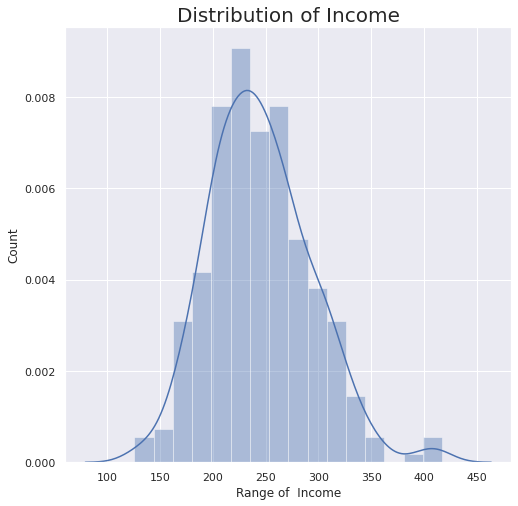

In [7]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.set(style = 'darkgrid')
sns.distplot(dataset['INCOME'])
plt.title('Distribution of Income', fontsize = 20)
plt.xlabel('Range of  Income')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


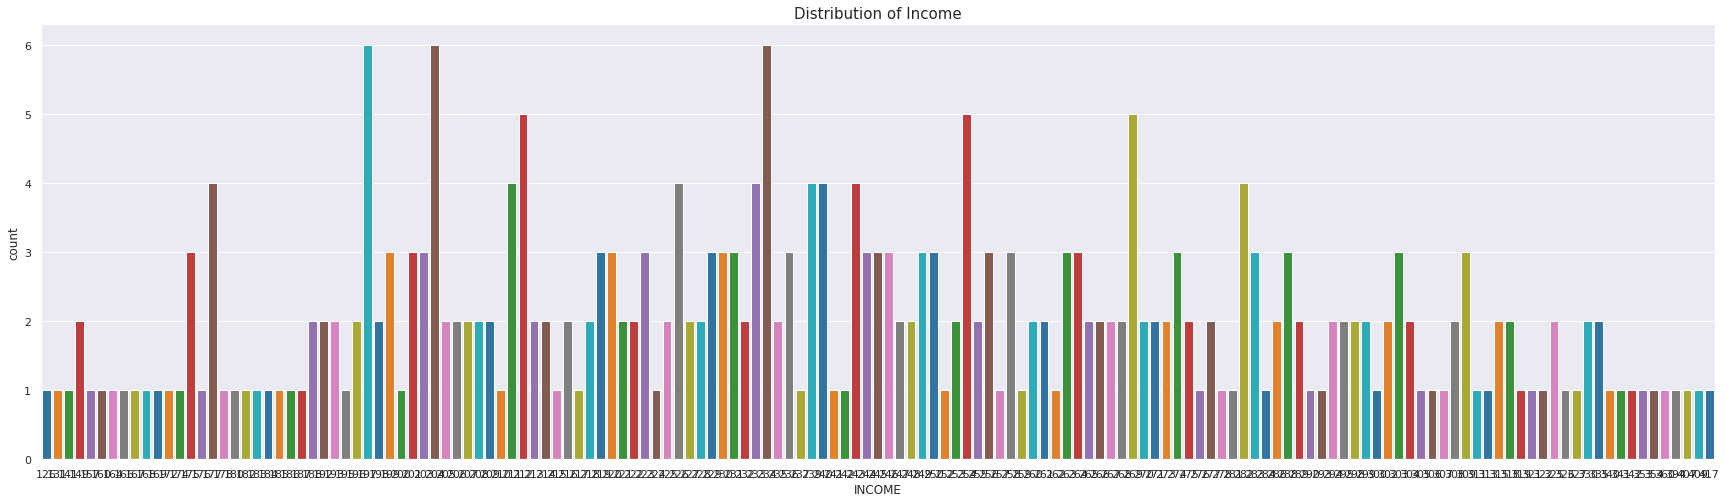

In [8]:
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset['INCOME'], palette = 'tab10')
plt.title('Distribution of Income', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


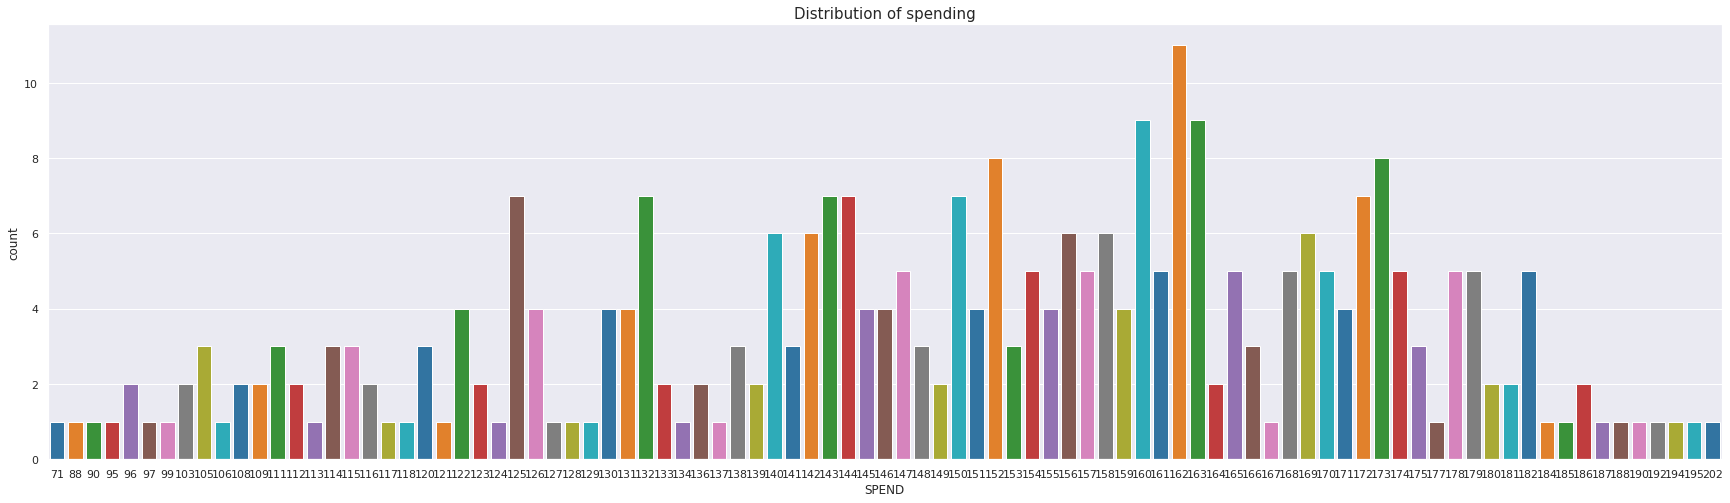

In [9]:
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset['SPEND'], palette = 'tab10')
plt.title('Distribution of spending', fontsize = 15)
plt.show()

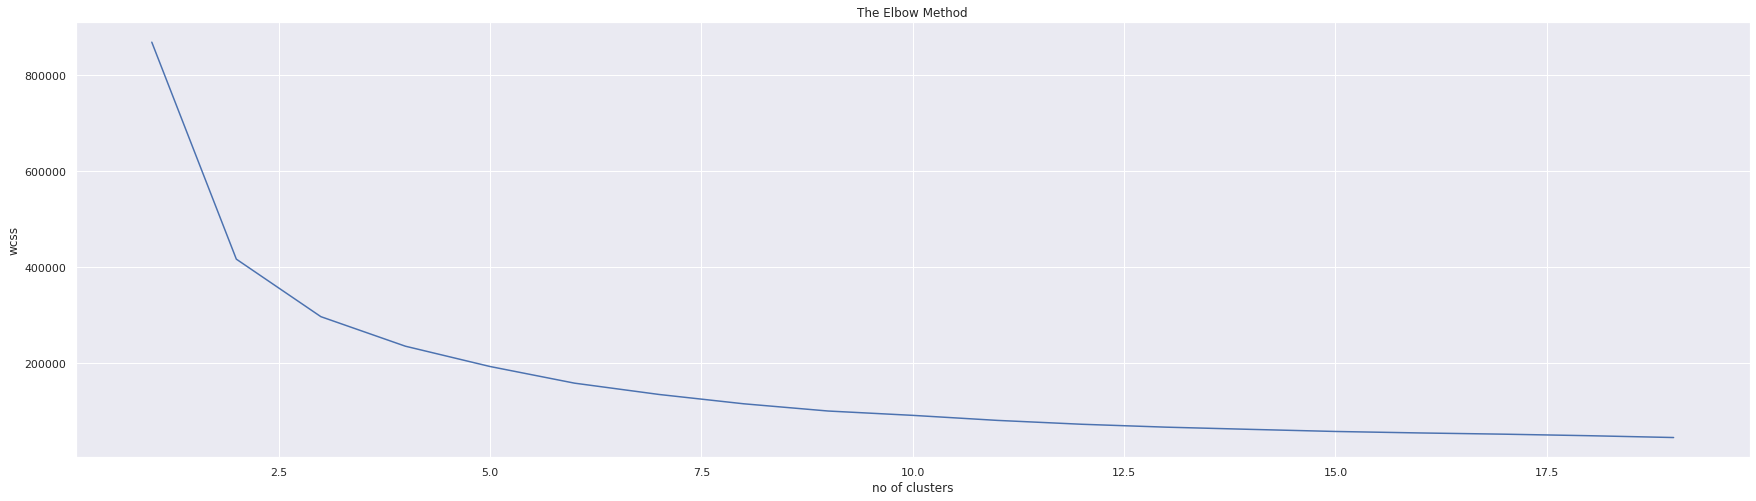

In [10]:
from sklearn.cluster import KMeans
#Elbow method
wcss=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(dataset_feature)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

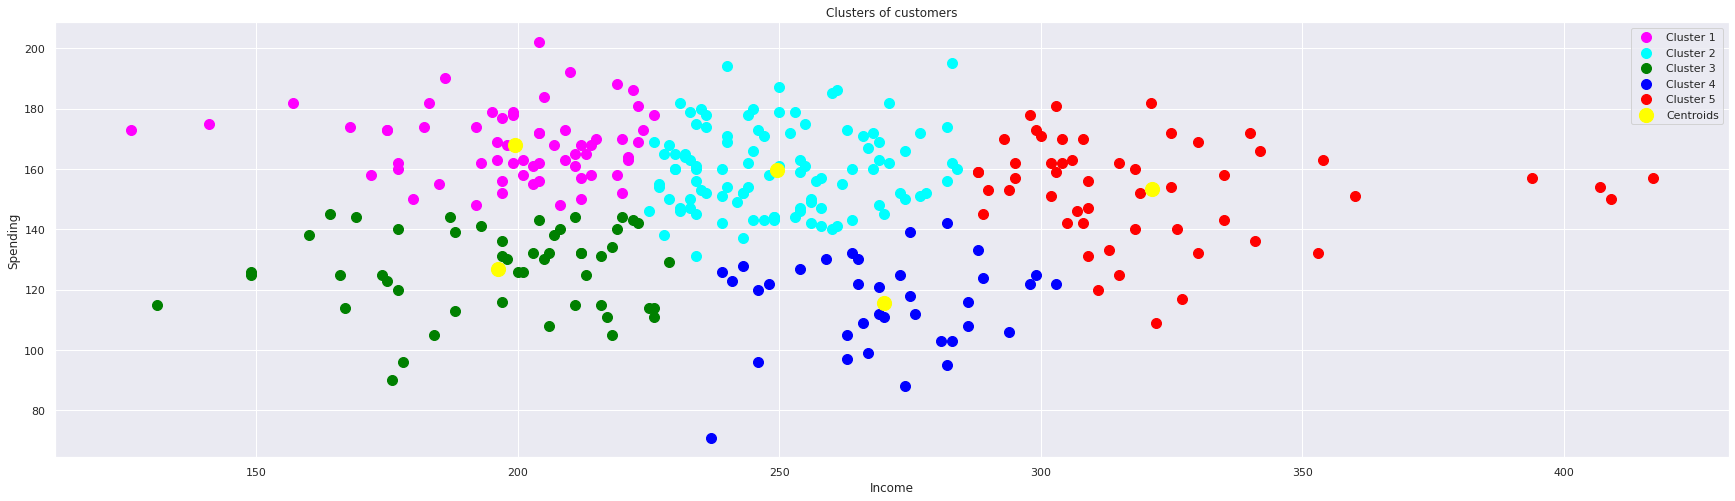

In [11]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(dataset_feature)  


plt.scatter(dataset_feature[y_kmeans == 0, 0], dataset_feature[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(dataset_feature[y_kmeans == 1, 0], dataset_feature[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(dataset_feature[y_kmeans == 2, 0], dataset_feature[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataset_feature[y_kmeans == 3, 0], dataset_feature[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(dataset_feature[y_kmeans == 4, 0], dataset_feature[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,c='yellow',label='centroids')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()

The People who are represented by Red dots having good income and leaving luxury life

The People who are represented by Magenta dots having less income but leaving luxury life

The People who are represented by Green dots having less income and spend less money on life 

The People who are represented by Blue dots having good income but they are save money for security

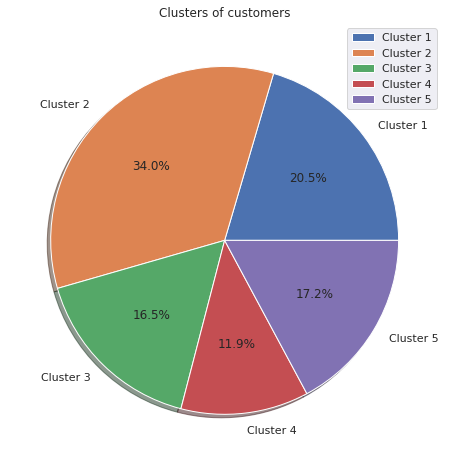

In [12]:
class_1 = dataset_feature[y_kmeans == 0]
class_2 = dataset_feature[y_kmeans == 1]
class_3 = dataset_feature[y_kmeans == 2]
class_4 = dataset_feature[y_kmeans == 3]
class_5 = dataset_feature[y_kmeans == 4]

data = [len(class_1),len(class_2),len(class_3),len(class_4),len(class_5)]

plt.pie(data,labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'],
        shadow=True,autopct='%1.1f%%')
plt.title('Clusters of customers')
plt.legend()
plt.show()

The People who are represented by Purple color having good income and leaving luxury life = **17.2 %**

The People who are represented by Blue color having less income but leaving luxury life = **20.5 %**

The People who are represented by Green color having less income and spend less money on life = **16.5 %**

The People who are represented by Red color having good income but they are save money for security = **11.9 %**